In [35]:
import os

import pandas as pd
from matplotlib import pyplot as plt

from source.utils.helper import bar_plot

In [36]:
data_path = os.path.join("..", "data")

In [37]:
df = pd.read_csv(
    os.path.join(data_path, "data_cocktails.csv"),
    index_col=0,
    encoding="utf-8",
    dtype={
        "index": int,
        "strDrink": str,
        "strCategory": str,
        "strGlass": str,
        "strIngredients": str,
        "Alc_type": str,
        "Basic_taste": str,
        "strInstructions": str,
        "strMeasures": str,
        "Value_ml": float,
        "Value_gr": float,
        "Garnish_amount": str,
        "Garnish_type": str,
    },
)

In [38]:
df.head()

,strDrink,strCategory,strGlass,strIngredients,Alc_type,Basic_taste,strInstructions,strMeasures,Value_ml,Value_gr,Garnish_amount,Garnish_type
index,,,,,,,,,,,,
0,'57 Chevy with a White License Plate,Cocktail,Highball glass,Creme De Cacao White,Creamy Liqueur,NaN,1. Fill a rocks glass with ice 2.add white cre...,1 oz white,30.0,NaN,NaN,NaN
1,'57 Chevy with a White License Plate,Cocktail,Highball glass,Vodka,Vodka,NaN,1. Fill a rocks glass with ice 2.add white cre...,1 oz,30.0,NaN,NaN,NaN
2,1-900-FUK-MEUP,Shot,Old-fashioned glass,Grand Marnier,Triple Sec,NaN,Shake ingredients in a mixing tin filled with ...,1/4 oz,7.5,NaN,NaN,NaN
3,1-900-FUK-MEUP,Shot,Old-fashioned glass,Midori Melon Liqueur,Sweet Liqueur,NaN,Shake ingredients in a mixing tin filled with ...,1/4 oz,7.5,NaN,NaN,NaN
4,1-900-FUK-MEUP,Shot,Old-fashioned glass,Malibu Rum,Rum,NaN,Shake ingredients in a mixing tin filled with ...,1/4 oz,7.5,NaN,NaN,NaN


## Categories distribution
### Drink category

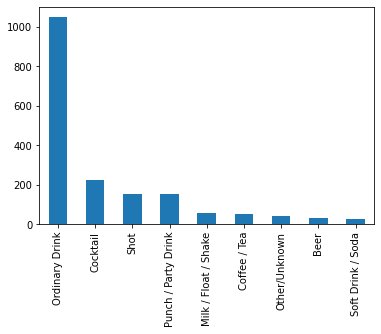

In [39]:
bar_plot(df, "strCategory")

### Type of glass

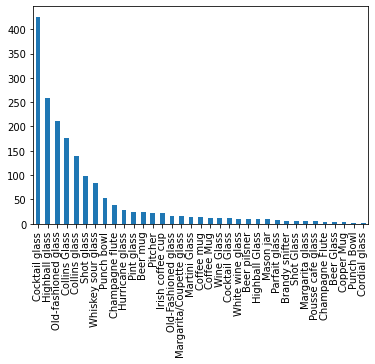

In [40]:
bar_plot(df, "strGlass")

### Alcohol type

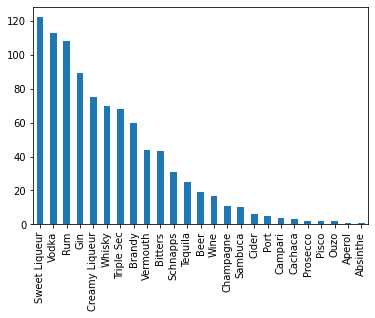

In [41]:
bar_plot(df, "Alc_type")

### Basic taste

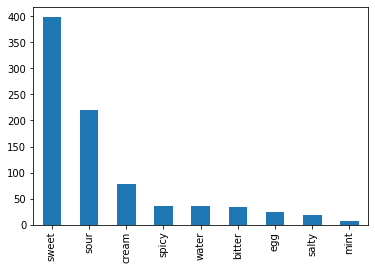

In [42]:
bar_plot(df, "Basic_taste")

### Garnish types

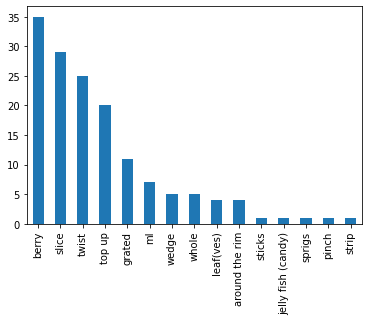

In [43]:
bar_plot(df, "Garnish_type")

### Preparation steps for each recipe
Here we see that the instructions feature is the same for all the multiple rows belonging to the same recipe.

In [44]:
df.groupby("strDrink")["strInstructions"].nunique()

strDrink
'57 Chevy with a White License Plate    1
1-900-FUK-MEUP                          1
110 in the shade                        1
151 Florida Bushwacker                  1
155 Belmont                             1
                                       ..
Zipperhead                              1
Zippy's Revenge                         1
Zizi Coin-coin                          1
Zorbatini                               1
Zorro                                   1
Name: strInstructions, Length: 473, dtype: int64

## Clean data

### Clean Garnish_amount column

In [ ]:
df["Garnish_amount"].unique()

Replace non-numerical measures in `Garnish_amount` and transform the column into float values.

In [ ]:
df["Garnish_amount"].replace("1/2", "0.5", inplace=True)
df["Garnish_amount"] = df["Garnish_amount"].astype("float")

### Treat NaNs

In [ ]:
df.isna().sum().plot.bar()
plt.show()

Fill all NaN values with 0 in the numerical columns.

In [ ]:
numerical_cols = df.select_dtypes(include="number").columns
df[numerical_cols] = df.loc[:, numerical_cols].fillna(0.0)

### Treat strings

Convert all strings to lowercase except for the cocktail name

In [ ]:
str_columns = [
    "strCategory",
    "strGlass",
    "strIngredients",
    "Alc_type",
    "Basic_taste",
    "strInstructions",
    "strMeasures",
    "Garnish_type",
]
df[str_columns] = df[str_columns].applymap(lambda x: x.lower(), na_action="ignore")

### Rename columns

In [ ]:
new_names = {
    "strDrink": "Cocktail",
    "strCategory": "Category",
    "strGlass": "Glass",
    "strIngredients": "Ingredient",
    "strInstructions": "Steps",
    "strMeasures": "Measure",
}
df.rename(columns=new_names, inplace=True)

### Save file

In [ ]:
df.to_pickle(os.path.join(data_path, "processed-cocktails-data.pkl"))
